# Classification results

In [ ]:
from utils.calculate_metrics import calculate_metrics
from sklearn.metrics import classification_report

print("Clf:")

for model in ['HyperGT-tablet-new', 'STGCN-tablet-new', 'CTRGCN-tablet-new', 'HDGCN-tablet-new','MyModel-tablet']:
    result, _, _ = calculate_metrics(f"./ckpts/{model}/clf/clf_test_results.csv")
    print(f"{model.upper()} & {result} \\\\ \\hline")
    # calculate_metrics(f"./ckpts/{model}/det/det_test_results.csv")
    
print("Detection:")

for model in ['HyperGT-tablet-new', 'STGCN-tablet-new', 'CTRGCN-tablet-new', 'HDGCN-tablet-new', 'MyModel-tablet']:
    result, _, _ = calculate_metrics(f"./ckpts/{model}/det/det_test_results.csv")
    print(f"{model.upper()} & {result} \\\\ \\hline")

Clf:
HYPERGT-TABLET-NEW & 0.9314 & 0.9098 & 0.8759 & 0.8703 \\ \hline
STGCN-TABLET-NEW & 0.9139 & 0.9041 & 0.8562 & 0.8424 \\ \hline
CTRGCN-TABLET-NEW & 0.9251 & 0.9078 & 0.8722 & 0.8602 \\ \hline
HDGCN-TABLET-NEW & 0.9366 & 0.9265 & 0.8738 & 0.8600 \\ \hline
MYMODEL-TABLET & 0.9345 & 0.9234 & 0.8877 & 0.8684 \\ \hline
Detection:
HYPERGT-TABLET-NEW & 0.9567 & 0.8421 & 0.8779 & 0.9257 \\ \hline
STGCN-TABLET-NEW & 0.9026 & 0.7281 & 0.7792 & 0.9004 \\ \hline
HDGCN-TABLET-NEW & 0.9641 & 0.8913 & 0.8843 & 0.8777 \\ \hline
CTRGCN-TABLET-NEW & 0.9699 & 0.9052 & 0.9046 & 0.9040 \\ \hline
MYMODEL-TABLET & 0.9561 & 0.8661 & 0.8579 & 0.8501 \\ \hline


In [7]:
result,  y_pred, y_true = calculate_metrics(f"./ckpts/HyperGT-tablet/clf/clf_test_results.csv")
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6818    0.9375    0.7895        16
           1     0.5926    1.0000    0.7442        16
           2     1.0000    0.4615    0.6316        26
           3     1.0000    0.9167    0.9565        24
           4     1.0000    0.6667    0.8000        18
           5     1.0000    0.9615    0.9804        26
           6     1.0000    1.0000    1.0000        20
           7     1.0000    0.9091    0.9524        22
           8     0.8276    1.0000    0.9057        24
           9     0.5862    0.7083    0.6415        24
           a     0.8926    0.9419    0.9165       344
           b     0.9881    0.7981    0.8830       104
   backspace     0.9843    0.9756    0.9799       450
           c     0.9635    0.9851    0.9742       134
       comma     0.9115    0.9717    0.9406       106
           d     0.9467    0.9861    0.9660       216
           e     0.9870    0.9907    0.9889       538
           f     0.9123    

      Unnamed: 0    pred  target pred_category target_category
0              0       t       t           a-z             a-z
1              1       h       h           a-z             a-z
2              2       e       e           a-z             a-z
3              3   space   space         space           space
4              4       a       q           a-z             a-z
...          ...     ...     ...           ...             ...
6617        6617       e       e           a-z             a-z
6618        6618       r       r           a-z             a-z
6619        6619       s       s           a-z             a-z
6620        6620  period  period        period          period
6621        6621   space   space         space           space

[6622 rows x 5 columns]


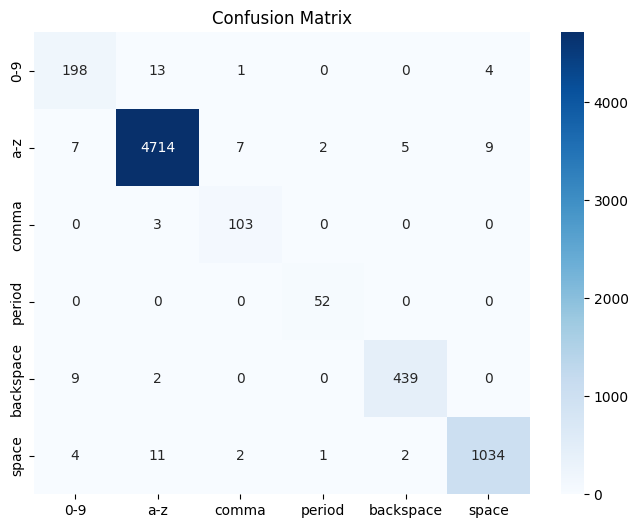

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define category mapping function
def categorize(char):
    if char.isdigit():
        return "0-9"
    elif char.isalpha() and len(char) == 1:
        return "a-z"
    else:
        return char

# Load CSV
df = pd.read_csv("/GitHub/keystroke-recognition/ckpts/HyperGT-tablet/clf/clf_test_results.csv")  # Replace with actual file path

# Map predictions and targets to categories
df["pred_category"] = df["pred"].astype(str).apply(categorize)
df["target_category"] = df["target"].astype(str).apply(categorize)
print(df)
# Get unique categories
categories = ["0-9", "a-z", "comma", "period", "backspace", "space"]

# Compute confusion matrix
cm = confusion_matrix(df["target_category"], df["pred_category"], labels=categories)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=categories, yticklabels=categories, cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Stream results

In [3]:
# Top view HyperGT more data prediction
# Correct text using gpt chat: https://chatgpt.com/share/66fd728d-346c-8012-accd-f90fa5851b69
from utils.realtime_util import process_prediction, evaluate, remove_consecutive_letters
avg_eds = 0
avg_wer = 0

print("----Video 6----")
pred_6 = process_prediction('ckpts/HyperGT_add_data/stream_results/6.csv', active_thres=0.5, key_thres=0.9)
print(pred_6)
pred_6 = remove_consecutive_letters(pred_6)
print("Raw prediction:", pred_6)
corrected_6 = "Dear Quincy, I hope you are doing well. I wanted to update you on our latest project, which has been quite the journey. The work involves a series of complex tasks, each with its unique challenges. Our team, including Kevin and Zelda, has been diligently addressing these issues. Recently, we faced several quirky situations that required immediate attention. Thankfully, we managed to address them with the help of our innovative techniques and quick adjustments. The process has been quite rigorous, but we are making significant strides. Our project is driven by advanced algorithms and cutting-edge technology. Key aspects include X-ray data analysis, sifting through extensive datasets, and precise measurements. We’ve had to navigate through tricky scenarios, but we are confident in the direction we are heading. If you have any questions or need more details, please feel free to reach out. I’m available for a quick call if that would be more convenient. Your feedback and insights are highly valued and will help ensure the project meets all expectations. Thank you for your continued support and understanding. We look forward to sharing more updates with you soon. Best regards, Jack Q. Izizmer."
gt_6 = "dear quincy, i hope you are doing well. i wanted to update you our latest project, which has been quite the journey. the work involves a series of complex tasks, each with its uniques challenges. our team, including kevin and zelda, has been diligently working to tackle these issues. recently we faced several quirky situations that required immediate attention. thankfully, we managed to address them with the help of our innovative techniques and quick adjustments. the process has been quite rigorous, but we are making significant strides. our project is driven by advanced algorithms and cutting edge technology. the key aspects include xray data analysis, zipping through extensive datasets, and precise measurments. we have had to navigate through tricky scenarios, but we are confident in the direction we are heading. if you have any questions or need more details, please feel free to reach out. we are available for a quick call if that would be more convenient. your feedback and insights are highly valued and will help us ensure the project meets all expectiations. thank you for your continued support and undertanding. we look forward to sharing more updates with you soon. best regards, jack q. zimmer."
ed, we = evaluate(pred_6, gt_6)
ed, we = evaluate(corrected_6, gt_6)
avg_eds += ed
avg_wer += we


print("----Video 7----")
pred_7 = process_prediction('ckpts/HyperGT_add_data/stream_results/7.csv', active_thres=0.5, key_thres=0.9)
pred_7 = remove_consecutive_letters(pred_7)
print("Raw prediction:", pred_7)

gt_7 = "dear team, i hope you all had a fantastic time, our recent employee appreciation event. it was truly a pleasure to see everyone come together and enjoy the festivities. your enthusiasm and positive enery made the event a resounding success. we wanted to take a moment to extend our heartfelt gratitude to each of your hard work and dedication. events like these are a small token of appreciation for the incredible effort you put into your roles every day. as we move forward, lets carry forward this spirit of camaraderies and teamwork. your contributions are invaluable to our company success, and we look forward to achieveing even greater milestones together. once again, thank you for being an integral part of our team. heres to continue success and many more memorable moments ahead. best regards, katty"
corrected_7 = "Dear team, I hope you all had a fantastic time at our recent employee appreciation event. It was truly a pleasure to see everyone come together and enjoy the festivities. Your enthusiasm and positive energy made the event a resounding success. We wanted to take a moment to extend our heartfelt gratitude for your hard work and dedication. Events like these are a small token of appreciation for the incredible effort you put into your roles every day. As we move forward, let’s carry this spirit of camaraderie and teamwork. Your contributions are invaluable to our company’s success, and we look forward to achieving even greater milestones together. Once again, thank you for being an integral part of our team. Here’s to continued success and many more memorable moments ahead. Best regards, Keaty."
ed, we = evaluate(pred_7, gt_7)
ed, we = evaluate(corrected_7, gt_7)
avg_eds += ed
avg_wer += we

print("----Video 19----")
pred_19 = process_prediction('ckpts/HyperGT_add_data/stream_results/19.csv', active_thres=0.5, key_thres=0.9)
pred_19 = remove_consecutive_letters(pred_19)
print("Raw prediction:", pred_19)
corrected_19 = "Hello Jouhan, thank you for shopping at our website. We guarantee your satisfaction with our high-quality products and customer support. Since your experience with the order did not live up to our high standards, we have issued you a credit in the amount of $100. Please allow three to five days for your bank to apply this credit to your account. If you have any questions, please visit customer support. Thank you again for shopping with us. We look forward to serving you in the future. Sincerely."
gt_19 = "hello john, thank you for shopping at our website. we guarantee your satisfaction with our high quality products and customer support. since your expertise with the order did not live up to our high standards, we have issued you a credit in the amount of a hundred. please allow three to five days for your bank to apply this credit to your account. if you have any questions, please visit customer support. thank you again for shopping with us. we look forward to serving you in the future. sincerely"
ed, we = evaluate(corrected_19, gt_19)
avg_eds += ed
avg_wer += we

print("----Video 20----")
pred_20 = process_prediction('ckpts/HyperGT_add_data/stream_results/20.csv', active_thres=0.5, key_thres=0.9)
pred_20 = remove_consecutive_letters(pred_20)
print("Raw prediction:", pred_20)
corrected_20 = "Sels, I think I should give you a little background on a small venture. Bill Perfakinas and I have a strong personal and professional relationship. He is an extremely creative individual, often recognized as someone who thinks outside the box. Bill actually sat in a bar for years and said the next tradable market would be bandwidth. He has been successful in the gas business when he’s had someone to filter his ideas. As such, he provides an informal consulting role to Enron. He throws out ideas and, every once in a while, comes up with a great one. He pointed out an anomalous pricing occurrence in the options market, a market I don’t normally follow closely, which translated into a multimillion-dollar trade for Enron. In return, I have agreed to have Enron intermediate his trades within reason. I want to emphasize that continuing this relationship should be considered a high priority. I’m willing to accept some of the credit risk exposure as a cost of doing business. Bill understands his role as an independent in the market and performs the right risk-reward trades for someone with finite capital. I place very high confidence in Bill not conducting high-risk trades. That said, we certainly need to monitor his credit exposure and continue to require LDCs. Just understand that he is at a different level of sophistication than any other investment-grade counterpart. I understand there was some concern regarding the transaction’s spread option he traded. He was absolutely right about the valuation, and we, on the trading desk, knew it as well. There are a couple of isolated products that Enron does not do a good job of valuing because of systems limitations. These models were created by the research group. The problem with these models is that they are strictly theoretical and do not take into account gas fundamental price limitations. For instance, it is less probable, though not impossible, for a transport spread from a production area to a market area to go within variable account than the models predict. This is why it was necessary to apply a correlation curve on top of the underlying correlation used. Obviously, we have this function in our pricing models. I wasn’t aware this methodology hadn’t been transferred to the valuation models. This has since been changed. Fortunately, these incidents tend to be extremely rare, as very few non-investment-grade companies trade these types of products. Finally, on Friday, Bill wanted to do a trade that reduced his exposure to Enron. I gave Mike the go-ahead to do the trade without consulting credit. I don’t believe I acted out of line in approving this trade considering the circumstances. If you believe differently, please advise. Thanks, John."
gt_20 = "russell, i think i should give you a little background on small ventures. bill perkins and i have a strong personal and professional relationship. he is an extremely creative individual. whalley actually commented on him today as someone who thinks outside the box. bill actually sat in a bar four years and said the next tradeable market would be bandwidth. he has been successful in the gas business when he has had someone to filter his ideas. as such he provides an informal consulting role to enron. he throws out ideas and, every once in a while, he comes up with a great one. he pointed out an anomalous pricing occurence in the options market, a market i normally do not follow closely, that i translated into a multimillion dollar trade for enron. in return, i have agreed to have enron intermidate his trades within reason. i want to emphasize that continuing this relationship should be considered a high priority. i am willing to accept some of the credit risk exposure as a cost of doing business. bill understands his role as an independent in the market and performs the right risk reward trades for someone with finite capital. i place very high confidence in bill not conducting high risk trades. having said that, we certainly need to monitor his credit exposure and continue to require lcs. just understand that he is at a different level of sophistication that any other non investment grade counterparty. i understand there was some concern in regards to the transco zsix spread option he traded. he was absolutely right about the valuation and we, on trading desk, knew it as well. there are a couple isolated products that enron does not do a good job of valuing because of systems limitations. this models created by the research group. the problem with these models is that they are strictly theoretical and do not take into account gas fundamental price limitations. for intance, it is less probable, though not impossible, for a transport spread from a production area to a market area to go within variable cost than the models predict. this it is necessary to apply a correlation skew curve on top of the overlying correlation used. obviously, we have this function in our pricing models. i was not aware this methodology had not been transfered to the valuation models. this has since been changed. fortunately, these incidents tend to be extremely rare as very few noninvestment grade companies trade these types of products. finally, on friday bill wanted to do a trade that reduce his exposure to enron. i gave mike maggi the go ahead to do the trade without consulting credit. i do not believe that i acted out of line in approving this trade considering the circumstances. if you believe differently, please advise. thanks, john."
ed, we = evaluate(corrected_20, gt_20)
avg_eds += ed
avg_wer += we


print("----Video 27----")
pred_27 = process_prediction('ckpts/HyperGT_add_data/stream_results/27.csv', active_thres=0.5, key_thres=0.9)
pred_27 = remove_consecutive_letters(pred_27)
print("Raw prediction:", pred_27)
corrected_27 = "Dear team, I hope you all had a fantastic time at our recent employee appreciation event. It was truly a pleasure to see everyone come together and enjoy the festivities. Your enthusiasm and positive energy made the event a resounding success. We wanted to take a moment to extend our heartfelt gratitude for your hard work and dedication. Events like these are a small token of appreciation for the incredible effort you put into your roles every day. As we move forward, let’s carry forward this spirit of camaraderie and teamwork. Your contributions are invaluable to our company’s success, and we look forward to achieving even greater milestones together. Once again, thank you for being an integral part of our team. Here’s to continued success and many more memorable moments ahead. Best regards."
gt_27 = "dear team, i hope you all had a fantastic time at our recent employee appreciation event. it was truly a pleasure to see everyone come together and enjoy the festivities. your enthusiasm and positive energy made the event a resounding success. we wanted to take a moment to extend our heartfelt gratitude to each of your hard work and dedication. events like these are a small token appreciation for the incredible effort you put into your role everyday. as we move forward, lets carry forward this spirit of camaraderie and teamwork. your contributions are invaluable to our company success, and we look forward to achieving even greater milestones together. once again, thank you for begin an integral part of our team. heres to continue success and many more memorable moments ahead. best regards, katty"
ed, we = evaluate(corrected_27, gt_27)
avg_eds += ed
avg_wer += we

print("----Video 28----")
pred_28 = process_prediction('ckpts/HyperGT_add_data/stream_results/28.csv', active_thres=0.5, key_thres=0.9)
pred_28 = remove_consecutive_letters(pred_28)
print("Raw prediction:", pred_28)
corrected_28 = "Dear Quincy, I hope you are doing well. I wanted to update you on our latest project, which has been quite the journey. The work involves a series of complex tasks, each with its unique challenges. Our team, including Kevin and Zelda, has been diligently working to tackle these issues. Recently, we faced several quirky situations that required immediate attention. Thankfully, we managed to address them with the help of our innovative techniques and quick adjustments. The process has been quite rigorous, but we are making significant strides. Our project is driven by advanced algorithms and cutting-edge technology. Key aspects include X-ray data analysis, sifting through extensive datasets, and precise measurements. We’ve had to navigate tricky scenarios, but we are confident in the direction we are heading. If you have any questions or need more details, please feel free to reach out. We are available for a quick call if that would be more convenient. Your feedback and insights are highly valued and will help us ensure the project meets all expectations. Thank you for your continued support and understanding. We look forward to sharing more updates with you soon. Best regards, Jack A. Zmer."
gt_28 = "dear quincy, i hope you are doing well. i wanted to update you on our latest project, which has been quite the journey. the work involves a series of complex tasks, each with its unique challenges. our team, including kevin and zelda, has been diligently working to tackle these issues. recently, we faced several quirky situations that required immediate attention. thankfully, we managed to address them with the help of our innovative techniques and quick adjustments. the process has been quite rigorous, but we are making significant strides. our project is driven by advanced algorithms and cutting edge technology. the key aspects include xray data analysis, zipping through extensive datasets, and precise measurements. we have had to navigate through tricky scenarios, but we are confident in the direction we are heading. if you have any questions or need more details, please feel free to reach out. we are available for a quick call if that would be more convenient. your feedback and insights are highly valued and will help us ensure the project meets all expectations. thank you for your continued support and understanding. we look forward to sharing more updates with you soon. best regards, jack q. zimmer"
ed, we = evaluate(corrected_28, gt_28)
avg_eds += ed
avg_wer += we

print(f"===============================")
print(f"Avg Edit distance similarity: {avg_eds / 6:.4f}")
print(f"Avg Word error rate: {avg_wer / 6:.4f}")

----Video 6----
yyyyddddeeeeaaarrr   qqqqpuuuiiiiinnccccyyyy,,,    iiiiii     hhhhhhhoooooopppuuee    yyyyyyooooouuuuurrr   aa    aaarrreeeeee    dddoooisnnng wweelll   ...    iiiiss     wwwaaaannnttttteeeeedddd  ttttooo    uupppppdddaaatttteeeeeo   yyroouu    oooouuuurre      llaaaatteeessssstttt   ppprrooojjjeeeeacccaaaattt,,,,,,   wwwwhhiiicccchhhhhh   hhhhhhhissssss  bbbbbeeeeennn   ruuuiiiitttteeeee   tttthhheeeee   jjoooorrrrauuuurrnnnnneeeeeyyyyy,,......    tttthhheeeee   wooorrrii    iiiinnnvvvvoooolllllvvvveeesssss       sssseeeerrrrrriiiiieeeessss   off   ccccoooommpppeexxxxx   tttasssss   ss,,   eeeaaaaaccccchhhh    sssssiiittttthhhh    iiiitttaassssss   uuannnniiiauuuiiiieeesssss   cccchhhhhallllllllellllleeannngggggeeee...    oooouuuurrrr   attteeeeeammmm,,,,,     iiinnnkccccclllllluuuduuuuuddiinnngggg   ikeeeennnvvviiinn      aaaanndd    xxxeeeeellddddddaaaa,,,,,    hhhhhhhsssssss    vvvebbbieeeeeeeennn      daiiiilliiiiidggggeeennntttlyyyyy  jssssoorriiiiiinnnggg tttttoo